Description: PyDAQmx is a python wrapper for NI DAQmx, a C API (Application programming interface with NI data acquisition hardware).
- This library simplifies interaction with DAQ hardware, enabling the use of Python for measurement and control applications.

Key Features of PyDAQmx:
* Direct C API access: PyDAQmx allows direct access to all DAQmx functions.
* Convenient python interface: It provides some pythonic convenience wrappers, like using callbacks for event based data acquisition.
* Integration with Numpy: Data acuquisition often integrate well with NumPy, which is useful for handling and processing large data sets efficiently.

[-0.00468199 -0.00403731 -0.00113621 ... -0.00468199 -0.00532668
 -0.00403731]


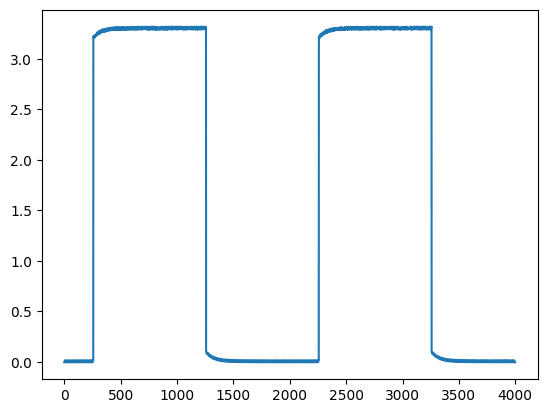

In [1]:
import numpy as np
from PyDAQmx import Task
import PyDAQmx
import matplotlib.pyplot as plt

# Define a callback function for data acquisition
class AnalogInput(Task):
    def __init__(self):
        Task.__init__(self)
        self.CreateAIVoltageChan("Dev1/ai0", "", PyDAQmx.DAQmx_Val_Cfg_Default, -10.0, 10.0, PyDAQmx.DAQmx_Val_Volts, None)
        self.CfgSampClkTiming("", 1000.0, PyDAQmx.DAQmx_Val_Rising, PyDAQmx.DAQmx_Val_ContSamps, 1000)

    def read_data(self):
        data = np.zeros((4000,), dtype=np.float64)
        read = PyDAQmx.int32()
        self.ReadAnalogF64(4000, 10.0, PyDAQmx.DAQmx_Val_GroupByChannel, data, 4000, PyDAQmx.byref(read), None)
        return data

# Usage
ai_task = AnalogInput()
ai_task.StartTask()
data = ai_task.read_data()
ai_task.StopTask()
ai_task.ClearTask()
print(data)
plt.plot(data)
plt.show()

# Py DAQmx Functions:
* Creating Tasks: CreateAIVoltageChan or CreateAOVoltageChan for creating analog input/output voltage channels.

* Configuring Sample clock Timing: CfgSampClkTiming allows configuring timing for tasks.

* Reading/Writing Data: ReadAnalogF64 and WriteAnalogF64 are functions for reading/writing floating point data.

# what is int32: 
* In python, int 32 isn't a built in data type like int. However, you will encounter it when working with libraries like NumPy.

* int 32 represents a 32 bit signed integer data type.
* it can store integer values ranging from -2,147,483,648 to 2,147,483,647.
* This data type is particularly useful when you need to control memory usage or when working with data that requires this specific range.

Where it is used?
NumPy: NumPy arrays can have a specified data type, including int 32. This allows for efficient storage and manipulation of large numerical data sets.

Other reasons: Other libraries dealing with numberical dta may also use int32 for similar reasons.

How to use it?
* NumPy: you can specify int32 as the dtype (datatype) when creating a NumPy array.

import numpy as np
arr = np.array([1,2,3], dtype=np.int32)

# Python's int:
* Python's built in int type is flexible and can represent integers of arbitrary size.
* It automatically adjusts its size to accommodate the value stored, so you don't need to worry about overflow errors in most cases.

* This flexibility comes at the cost of slightly higher meomry usage compared to fixed size integer types like int 32.

# What is Float 64 in Python?
In python, float64 refers to a data type representing double precision floating point numbers.

Precision: Float 64 uses 64 bits of memory to store a number, providing higher precision compared to float 32 (single precision). This means it can represent a wider range of values with more decimal places.

Standard: It's the standard floating point type in Python, meaning that when you create a floating point number e.g., x = 3.14 it's typically stored as float 64. 







What is & in C and byref function usage in Python:
* In my opionon & and byref meant same thing. This is a data type used in above implementation.

In C programming, the & symbol is an operator with two main uses depending on the context.

1. Address of operator:
* When used in front of a variable, & acts as the address of operator. It gives the memory address of the variable. This is useful for pointer operations, when you need to pass a variables address rather than it svalue.

c:
int number = 5
int *pointer = &number // pointer now holds the address of number.

* here, pointer holds the momory address of number, which allows it to modify the original variable indirectly.



byref(read): is the address of read <cparam 'P' (0x00000294E6F4A418)>
DAQmx Group by channel 0
DAQmx Val rising: 10280
DAQmx Continuous Samples 10123
DAQmx Val Cfg Default -1
DAQmx Val Volts 10348
[-0.00371496 -0.00371496 -0.00210324 ...  0.00047551 -0.0017809
 -0.00307027]


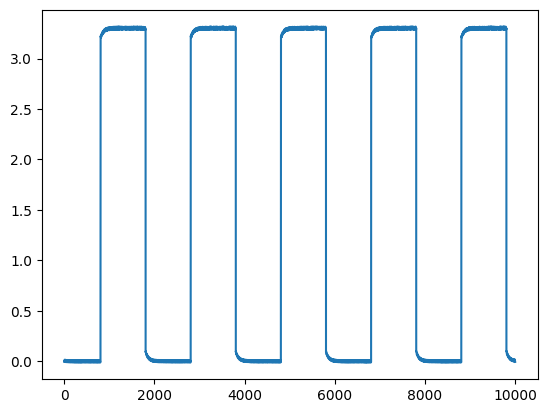

In [2]:
import numpy as np
from PyDAQmx import Task, DAQmx_Val_Cfg_Default, DAQmx_Val_Volts, DAQmx_Val_Rising, DAQmx_Val_ContSamps, DAQmx_Val_GroupByChannel
from PyDAQmx.DAQmxTypes import int32, float64, byref
import matplotlib.pyplot as plt

# Define a callback function for data acquisition
class AnalogInput(Task):
    def __init__(self, num_samples=4000):
        Task.__init__(self)
        self.num_samples = num_samples
        self.CreateAIVoltageChan("Dev1/ai0", "", DAQmx_Val_Cfg_Default, -10.0, 10.0, DAQmx_Val_Volts, None)
        self.CfgSampClkTiming("", 1000.0, DAQmx_Val_Rising, DAQmx_Val_ContSamps, 1000)

    def read_data(self):
        data = np.zeros((self.num_samples,), dtype=np.float64)
        read = int32()
        self.ReadAnalogF64(self.num_samples, 20.0, DAQmx_Val_GroupByChannel, data, self.num_samples, byref(read), None)
        print("byref(read): is the address of read", byref(read))
        print("DAQmx Group by channel", DAQmx_Val_GroupByChannel)
        print("DAQmx Val rising:", DAQmx_Val_Rising)
        print("DAQmx Continuous Samples", DAQmx_Val_ContSamps)
        print("DAQmx Val Cfg Default", DAQmx_Val_Cfg_Default)
        print("DAQmx Val Volts", DAQmx_Val_Volts)

        return data

if __name__ == "__main__":
    # Usage
    ai_task = AnalogInput(num_samples = 10000)
    ai_task.StartTask()
    data = ai_task.read_data()
    ai_task.StopTask()
    ai_task.ClearTask()
    print(data)
    plt.plot(data)
    plt.show()
